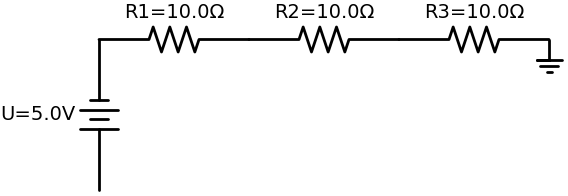

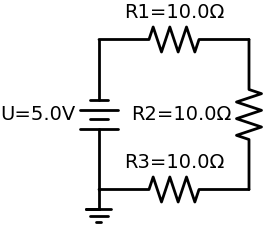

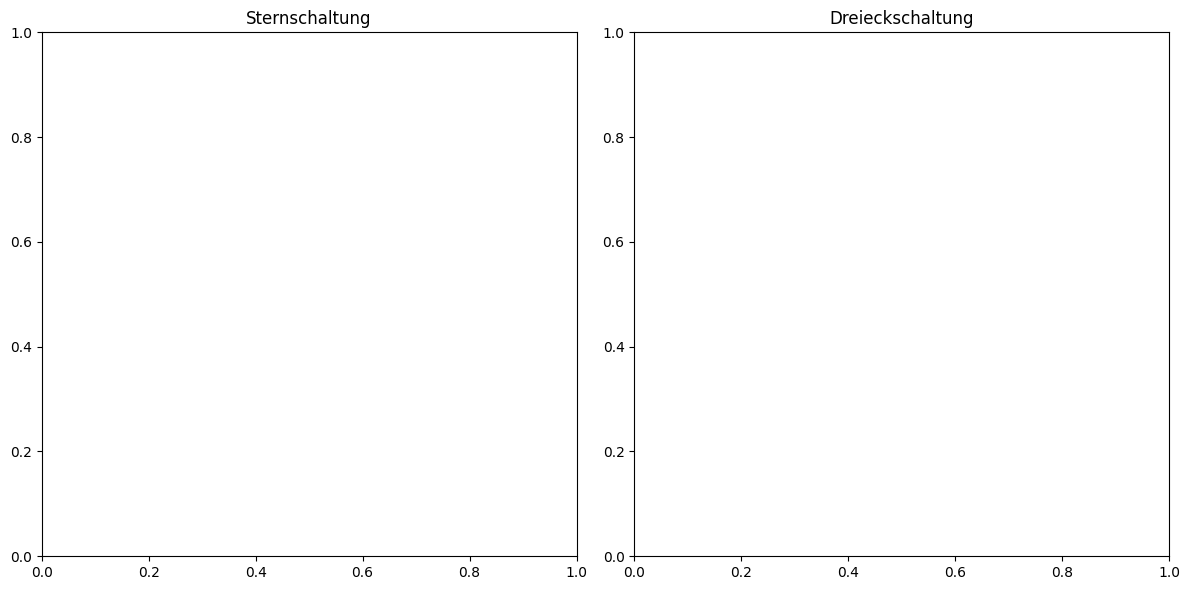

FloatSlider(value=10.0, description='R1 (Ω):', min=1.0, step=1.0)

FloatSlider(value=10.0, description='R2 (Ω):', min=1.0, step=1.0)

FloatSlider(value=10.0, description='R3 (Ω):', min=1.0, step=1.0)

FloatSlider(value=5.0, description='U1 (V):', max=20.0, min=1.0, step=1.0)

In [11]:
import schemdraw
import schemdraw.elements as e
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Funktion zum Zeichnen der Sternschaltung
def zeichne_sternschaltung(ax, R1, R2, R3, U1):
    with schemdraw.Drawing(ax=ax) as d:
        # Sternschaltung zeichnen
        d.add(e.Battery().up().label(f'U={U1}V'))
        d.add(e.Resistor().right().label(f'R1={R1}Ω'))
        d.add(e.Resistor().right().label(f'R2={R2}Ω'))
        d.add(e.Resistor().right().label(f'R3={R3}Ω'))
        d.add(e.Ground())
    ax.set_title("Sternschaltung")

# Funktion zum Zeichnen der Dreieckschaltung
def zeichne_dreieckschaltung(ax, R1, R2, R3, U1):
    with schemdraw.Drawing(ax=ax) as d:
        # Dreieckschaltung zeichnen
        d.add(e.Battery().up().label(f'U={U1}V'))
        d.add(e.Resistor().right().label(f'R1={R1}Ω'))
        d.add(e.Resistor().down().label(f'R2={R2}Ω'))
        d.add(e.Resistor().left().label(f'R3={R3}Ω'))
        d.add(e.Ground())
    ax.set_title("Dreieckschaltung")

# Widgets für Widerstände und Spannung
R1_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='R1 (Ω):')
R2_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='R2 (Ω):')
R3_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='R3 (Ω):')
U1_widget = widgets.FloatSlider(value=5, min=1, max=20, step=1, description='U1 (V):')

# Funktion zum Aktualisieren der Schaltpläne
def aktualisiere_schaltungen(change=None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Erstelle zwei subplots nebeneinander
    zeichne_sternschaltung(axs[0], R1_widget.value, R2_widget.value, R3_widget.value, U1_widget.value)
    zeichne_dreieckschaltung(axs[1], R1_widget.value, R2_widget.value, R3_widget.value, U1_widget.value)
    plt.tight_layout()
    plt.show()

# Verknüpfe die Widgets mit der Aktualisierungsfunktion
R1_widget.observe(aktualisiere_schaltungen, names='value')
R2_widget.observe(aktualisiere_schaltungen, names='value')
R3_widget.observe(aktualisiere_schaltungen, names='value')
U1_widget.observe(aktualisiere_schaltungen, names='value')

# Initiale Anzeige der Schaltungen
aktualisiere_schaltungen()

# Anzeige der Widgets
display(R1_widget, R2_widget, R3_widget, U1_widget)
